# Explore here

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.preprocessing import image

2025-05-16 18:35:46.890396: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-16 18:35:46.892050: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 18:35:46.897233: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-16 18:35:46.913065: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747420546.941701   15575 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747420546.94

In [4]:
data_dir = "../data/raw"

train_dir = 'data/train'  # carpeta que contiene 'cat' y 'dog'

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training',
    shuffle=True
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% de los datos para validación
)
# Get a list of all dog image file names
dog_subfolder = os.path.join(data_dir, "dog")

# Get a list of all dog image file names
dog_image_files = os.listdir(dog_subfolder)

# Load the first nine dog images
dog_images = []
for i in range(9):
    img_path = os.path.join(dog_subfolder, dog_image_files[i])
    img = image.load_img(img_path)  # Adjust target_size as needed
    img_array = image.img_to_array(img)
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    dog_images.append(img_array)

# Create a single figure to display all nine images
plt.figure(figsize=(12, 8))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(dog_images[i])
    plt.title('Dog Image')
    plt.axis('off')

# Adjust Layout
plt.tight_layout()

# Show the pictures
plt.show()

NameError: name 'datagen' is not defined

In [5]:
from tensorflow.keras.utils import get_file

path_to_zip = get_file(
    fname='cats_and_dogs_filtered.zip',
    origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=True
)

In [10]:
import os
from pathlib import Path

from tensorflow.keras.utils import get_file
from pathlib import Path
import os

# 1. Descargar y extraer el ZIP
zip_path = get_file(
    fname='cats_and_dogs_filtered.zip',
    origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=True
)

# 2. Obtener la carpeta que contiene los datos extraídos
extract_dir = Path(zip_path).with_suffix('')  # quita .zip -> carpeta: cats_and_dogs_filtered

# 3. Subir un nivel para ver su contenido
parent_dir = extract_dir.parent

print("Ruta base:", parent_dir)

# 4. Mostrar todo lo que hay en esa carpeta
print("Contenido de la carpeta:", os.listdir(parent_dir))

# 5. Ruta definitiva
dataset_path = parent_dir / "cats_and_dogs_filtered"
print("Ruta al dataset final:", dataset_path)
print("Subcarpetas:", os.listdir(dataset_path))

Ruta base: /home/vscode/.keras/datasets
Contenido de la carpeta: ['cats_and_dogs_filtered_extracted', 'cats_and_dogs_filtered.zip']
Ruta al dataset final: /home/vscode/.keras/datasets/cats_and_dogs_filtered


FileNotFoundError: [Errno 2] No such file or directory: '/home/vscode/.keras/datasets/cats_and_dogs_filtered'

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import get_file
from pathlib import Path
import os

# 1. Descargar y extraer ZIP
zip_path = get_file(
    fname='cats_and_dogs_filtered.zip',
    origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=True
)

# 2. Identificar la carpeta extraída correctamente
dataset_path = Path(zip_path).with_suffix('')  # Esto será: 'cats_and_dogs_filtered_extracted'
dataset_path = dataset_path.parent / (dataset_path.name + "_extracted")

print("✅ Dataset en:", dataset_path)
print("📁 Subcarpetas:", os.listdir(dataset_path))

# 3. Cargar generadores
train_dir = dataset_path / 'train'
val_dir = dataset_path / 'validation'

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_gen = datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
    )

✅ Dataset en: /home/vscode/.keras/datasets/cats_and_dogs_filtered_extracted_extracted


FileNotFoundError: [Errno 2] No such file or directory: '/home/vscode/.keras/datasets/cats_and_dogs_filtered_extracted_extracted'

In [13]:
from tensorflow.keras.utils import get_file
from pathlib import Path
import os

# Descargar y extraer
zip_path = get_file(
    fname='cats_and_dogs_filtered.zip',
    origin='https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip',
    extract=True
)

# Buscar automáticamente el directorio que se extrajo
parent_dir = Path(zip_path).parent

# Buscar carpeta que empieza por 'cats_and_dogs_filtered' y es directorio
extracted_dir = next((p for p in parent_dir.iterdir() if p.is_dir() and p.name.startswith("cats_and_dogs_filtered")), None)

if extracted_dir is None:
    raise FileNotFoundError("No se encontró la carpeta extraída.")

print("✅ Ruta real del dataset:", extracted_dir)
print("📁 Subcarpetas:", os.listdir(extracted_dir))

✅ Ruta real del dataset: /home/vscode/.keras/datasets/cats_and_dogs_filtered_extracted
📁 Subcarpetas: ['cats_and_dogs_filtered']


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = extracted_dir / 'train'
val_dir = extracted_dir / 'validation'

datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_gen = datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

FileNotFoundError: [Errno 2] No such file or directory: '/home/vscode/.keras/datasets/cats_and_dogs_filtered_extracted/train'

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

# Ruta final del dataset ya extraído
base_dir = Path("/home/vscode/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered")

# Subcarpetas
train_dir = base_dir / 'train'
val_dir = base_dir / 'validation'

# Asegúrate de que existen
print("📁 Train dir:", train_dir.exists())
print("📁 Validation dir:", val_dir.exists())

# Generadores
datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

📁 Train dir: True
📁 Validation dir: True
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/tmp/ipykernel_15575/3224543632.py:32: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/vscode/.local/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128054 (\N{DOG FACE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


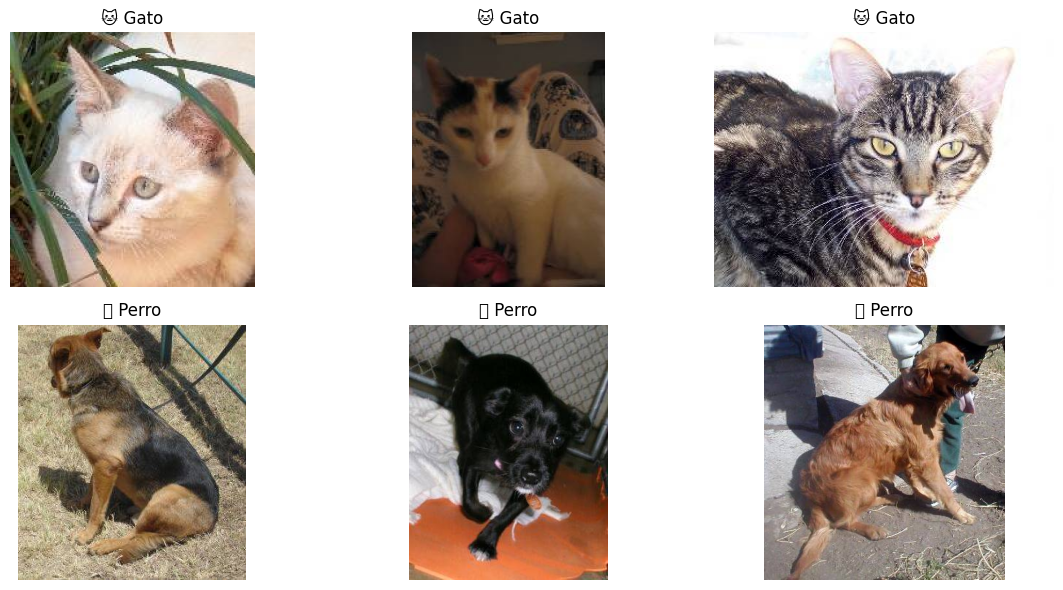

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from pathlib import Path

# Rutas a las carpetas
base_dir = Path("/home/vscode/.keras/datasets/cats_and_dogs_filtered_extracted/cats_and_dogs_filtered")
train_cat_dir = base_dir / 'train' / 'cats'
train_dog_dir = base_dir / 'train' / 'dogs'

# Obtener 3 imágenes al azar de cada clase
cat_images = random.sample(os.listdir(train_cat_dir), 3)
dog_images = random.sample(os.listdir(train_dog_dir), 3)

# Mostrar imágenes
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
for i, img_name in enumerate(cat_images):
    img_path = train_cat_dir / img_name
    img = mpimg.imread(img_path)
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title("🐱 Gato")

for i, img_name in enumerate(dog_images):
    img_path = train_dog_dir / img_name
    img = mpimg.imread(img_path)
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    axes[1, i].set_title("🐶 Perro")

plt.tight_layout()
plt.show()